# Overview 

Please use the following notebook to work on homework problems.

### Install Dependencies

Please run each code chunk in this section prior to moving forward in the notebook! 

In [ ]:
#@title  <-- Run Me: (Hidden) Installing Spark
%%bash 

## Setup Spark on Colab
pip install -q pyspark
apt-get -qq install -y openjdk-8-jdk-headless

## Setup port-forwarding

# Download ngrok
wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# Unload ngrok
unzip -q ngrok-stable-linux-amd64.zip

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [ ]:
#@title  <-- Run Me: (Hidden) Environment Variable Setup
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import pyspark 
import pyspark.sql.functions as F
from pyspark import SparkContext, SparkConf
from pyspark.sql.session import SparkSession

# Set configuration scope to be local and use port 4050
config_scope = SparkConf().set("spark.ui.port", "4050").set("spark.ui.showConsoleProgress", "false")

# Create the connection to a Spark cluster
sc = pyspark.SparkContext(conf = config_scope)

# Create a session to programmatically build Spark RDD, DataFrame and DataSet
spark = SparkSession(sc)

# Diagnostics

In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np

print(f"python: {sys.version}")
print(f"pyspark: {sc.version}")
print(f"pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

try:
  from google.colab import drive
  is_google_colab = True

  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
pyspark: 3.2.1
pandas: 1.3.5
NumPy: 1.21.6
Notebook is on Google CoLab


## Save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to your Google Drive! Please go to: 

```
File -> Save a Copy in Drive
```



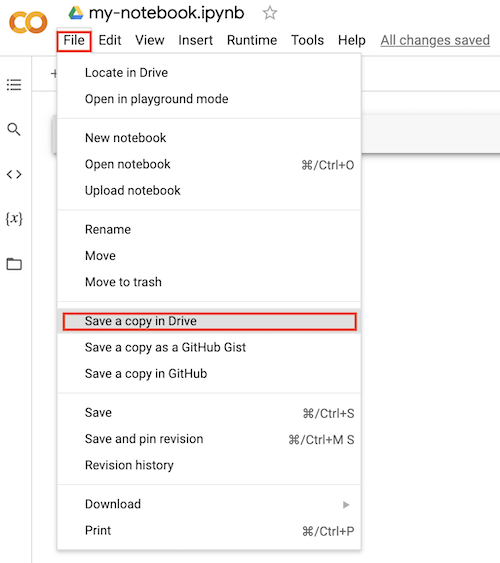

**If you _forget_ to save a copy of the notebook, all of your work will be lost when you close out of Google Colab.**

## Spark

In [ ]:
## spark code

In [ ]:
from google.colab import drive
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weather_df = spark.read.csv('/content/drive/MyDrive/STAT 480/weather.csv', header = True, inferSchema = True)

In [ ]:
weather_df.show(10)

+-----------+-----+------------------+------------------+------------------+-----------+---+----+----+----+-------+-------+---------+--------------+--------------+------+----+-------+
|station_num|month|           temp_ft|          dewpt_ft|          wind_knt|maxwind_knt|fog|rain|snow|hail|thunder|tornado|precip_in|max_temp_frnht|min_temp_frnht|   lat| lon|elev(m)|
+-----------+-----+------------------+------------------+------------------+-----------+---+----+----+----+-------+-------+---------+--------------+--------------+------+----+-------+
|     100180|    1|             38.66|30.116666666666667|12.543333333333333|       28.9| 14|   1|   0|   0|      0|      0|      0.0|          46.4|           0.0|54.913|8.34|   15.5|
|     100180|    2|38.324999999999996|29.728571428571428| 14.87857142857143|       36.9| 15|   3|   0|   0|      0|      0|      0.0|          44.6|           0.0|54.913|8.34|   15.5|
|     100180|    3| 39.41290322580645| 33.31935483870968|12.538709677419355|    

In [ ]:
inputCols = weather_df.columns

In [ ]:
inputCols.remove('tornado')

In [ ]:
vectorAssembler = VectorAssembler(inputCols = inputCols, outputCol = 'features')

In [ ]:
vector_df = vectorAssembler.transform(weather_df)

In [ ]:
vector_df.show(10)

+-----------+-----+------------------+------------------+------------------+-----------+---+----+----+----+-------+-------+---------+--------------+--------------+------+----+-------+--------------------+
|station_num|month|           temp_ft|          dewpt_ft|          wind_knt|maxwind_knt|fog|rain|snow|hail|thunder|tornado|precip_in|max_temp_frnht|min_temp_frnht|   lat| lon|elev(m)|            features|
+-----------+-----+------------------+------------------+------------------+-----------+---+----+----+----+-------+-------+---------+--------------+--------------+------+----+-------+--------------------+
|     100180|    1|             38.66|30.116666666666667|12.543333333333333|       28.9| 14|   1|   0|   0|      0|      0|      0.0|          46.4|           0.0|54.913|8.34|   15.5|[100180.0,1.0,38....|
|     100180|    2|38.324999999999996|29.728571428571428| 14.87857142857143|       36.9| 15|   3|   0|   0|      0|      0|      0.0|          44.6|           0.0|54.913|8.34|   15

In [ ]:
train_df, test_df = vector_df.randomSplit(weights = [0.8, 0.2], seed = 0)

In [ ]:
lr = LinearRegression(featuresCol = 'features', labelCol = 'tornado')

In [ ]:
model = lr.fit(train_df)

In [ ]:
predict = model.transform(test_df)

In [ ]:
evaluate = model.evaluate(test_df)

In [ ]:
evaluate.rootMeanSquaredError

0.03703733912340804

In [ ]:
predict_df = predict.toPandas()

In [ ]:
predict_df['tornado'].sum()

16

In [ ]:
predict_df['prediction'].sum()

15.197793525040098